In [1]:
#STEP 1:- Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns


In [4]:
# STEP 2:- Data preparation
customer_data = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
customer_spending = transactions.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    total_transactions=("TransactionID", "count"),
    avg_transaction_value=("TotalValue", "mean")
).reset_index()
# Merge customer and transaction data
customer_data = customer_data.merge(customer_spending, on="CustomerID", how="left").fillna(0)

# Encode categorical variables (Region)
customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numeric_features = ["total_spent", "total_transactions", "avg_transaction_value"]
customer_data[numeric_features] = scaler.fit_transform(customer_data[numeric_features])

# Drop non-relevant columns
features = customer_data.drop(columns=["CustomerID", "CustomerName", "SignupDate"])

print(features.head())

   total_spent  total_transactions  avg_transaction_value  Region_Europe  \
0    -0.051884            0.000000              -0.054781          False   
1    -0.862714           -0.451294              -0.903985          False   
2    -0.393842           -0.451294              -0.011575          False   
3     1.035375            1.353881              -0.061170          False   
4    -0.769499           -0.902587              -0.025086          False   

   Region_North America  Region_South America  
0                 False                  True  
1                 False                 False  
2                 False                  True  
3                 False                  True  
4                 False                 False  


c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

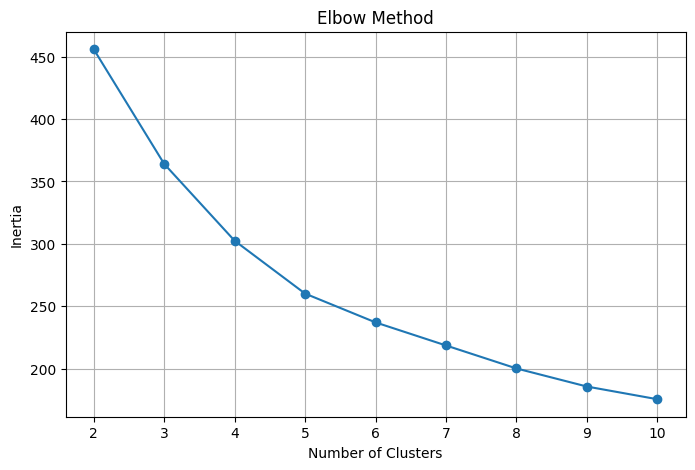

In [5]:
#STEP 3:- K-means clustering
#3.1 - Determining the number of clusters using elbow method
# Compute inertia for a range of cluster numbers
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.savefig("elbow.png", dpi=300, bbox_inches="tight")
plt.show()

In [6]:
# 3.2 - Apply k means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(features)

# Add cluster labels
print(customer_data[["CustomerID", "Cluster"]].head())

  CustomerID  Cluster
0      C0001        1
1      C0002        3
2      C0003        1
3      C0004        2
4      C0005        3


c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
#3.3-Evaluate clustering using DB index
db_index = davies_bouldin_score(features, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.2632791306417044


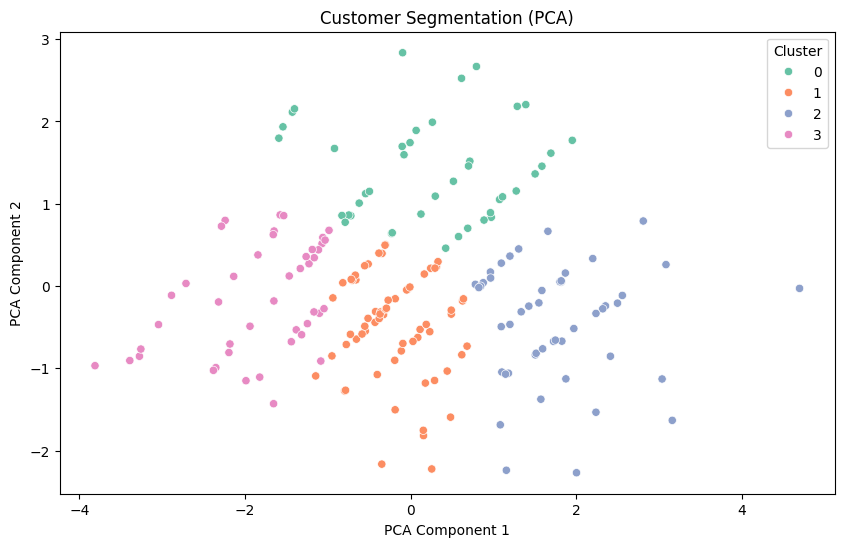

In [8]:
#STEP 4:- Visualize Clusters 
# Using PCA to reduce dimension for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Add PCA components to DataFrame
customer_data["PCA1"] = pca_features[:, 0]
customer_data["PCA2"] = pca_features[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=customer_data, palette="Set2")
plt.title("Customer Segmentation (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig("visuals.png", dpi=300, bbox_inches="tight")
plt.show()
